Question: 2

Train a Pure ANN with less than 10000 trainable parameters using the MNIST Dataset

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

## Create Train and Test Data 

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

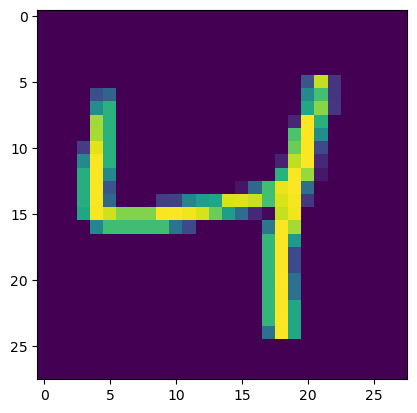

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

## Do the Standardization

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Create a  MLP model and add layers in it along with Activation functions

In [19]:
ann = Sequential()

ann.add(Flatten(input_shape=(28,28)))
ann.add(Dense(12,activation='relu'))
ann.add(Dense(6,activation='relu'))
ann.add(Dense(10,activation='softmax'))

Lets observe model attributes

In [20]:
ann.__dict__

{'_self_setattr_tracking': True,
 '_obj_reference_counts_dict': ObjectIdentityDictionary({<_ObjectIdentityWrapper wrapping True>: 1, <_ObjectIdentityWrapper wrapping <keras.src.saving.serialization_lib.Config object at 0x000001839C1F2B30>>: 1}),
 '_auto_get_config': True,
 '_auto_config': <keras.src.saving.serialization_lib.Config at 0x1839c1f2b30>,
 '_is_model_for_instrumentation': True,
 '_instrumented_keras_api': True,
 '_instrumented_keras_layer_class': False,
 '_instrumented_keras_model_class': True,
 '_trainable': True,
 '_stateful': False,
 'built': True,
 '_input_spec': None,
 '_build_input_shape': TensorShape([None, 28, 28]),
 '_saved_model_inputs_spec': TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='flatten_4_input'),
 '_saved_model_arg_spec': ([TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='flatten_4_input')],
  {}),
 '_supports_masking': True,
 '_name': 'sequential_4',
 '_activity_regularizer': None,
 '_trainable_weights': [],
 '_non_trainable_weights': 

In [21]:
ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 12)                9420      
                                                                 
 dense_13 (Dense)            (None, 6)                 78        
                                                                 
 dense_14 (Dense)            (None, 10)                70        
                                                                 
Total params: 9568 (37.38 KB)
Trainable params: 9568 (37.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Now, use loss fucntion and optimizer to update Weights and Biases while Training the MLP.**

In [22]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
history = ann.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 2.2615 - accuracy: 0.1706 - val_loss: 2.1146 - val_accuracy: 0.1807
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0176 - accuracy: 0.2088 - val_loss: 2.0118 - val_accuracy: 0.2072
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9884 - accuracy: 0.2090 - val_loss: 1.9963 - val_accuracy: 0.2125
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9768 - accuracy: 0.2122 - val_loss: 1.9875 - val_accuracy: 0.2087
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9378 - accuracy: 0.2313 - val_loss: 1.7242 - val_accuracy: 0.2921
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6166 - accuracy: 0.3130 - val_loss: 1.5622 - val_accuracy: 0.3314
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4899 - accuracy: 0.3852 - val_loss: 1.4009 - val_accuracy:

In [24]:
y_prob = ann.predict(X_test)

313/313 [==============================] - 1s 1ms/step


**NOTE**: for Test or predictions we will use Argmax fucnction. we used Softmax for training to predicts the Probabilities But now as user we want classification not the Probability so using Argmax fucntion,

In [25]:
y_pred = y_prob.argmax(axis=1)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8626

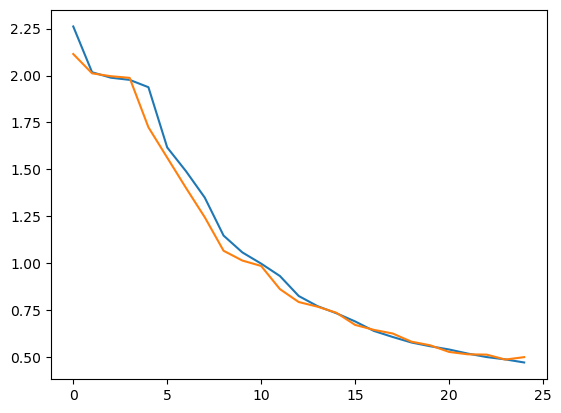

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

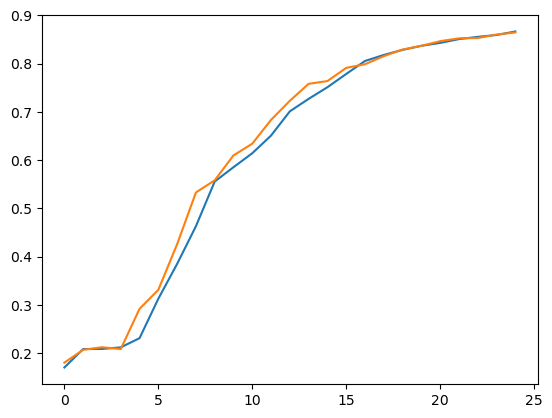

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

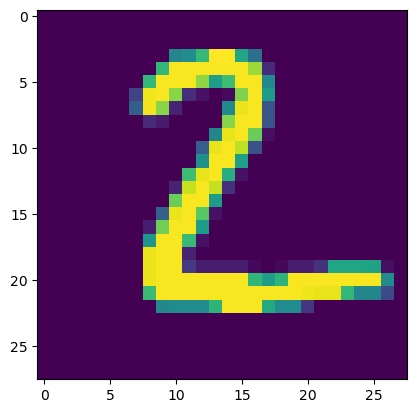

In [29]:
plt.imshow(X_test[1])

In [30]:
ann.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 24ms/step


array([2], dtype=int64)